<a href="https://colab.research.google.com/github/GyehyunJo/Olympic/blob/main/Code/OlympicAddDel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 팀 원

24/10/02(수)  

- 올림픽 > eda
- 아파트 > 예측

-----
**팀장** /
**팀명** /
**데이터셋**

----
자료 조사 >
데이터 분석 >
코드 작성 >
ppt 발표

----
*전처리*
>> 다같이 하되 각자 2개의 인사이트 도출

---------------------------------------------------
10/02
전처리

10/04
인사이트

10/07
ppt및 남은 작업

10/08
발표

---------------------------------------------------
NOC를 합쳐야 되는가?
그냥 팀명으로 해야 할지
>> 합치지 않아도 된다.

전처리를 어떻게 할 것인가.
## 결측치 해결
결측치 값들
- 나이 9474
- 키 60171
- 몸무게 62875
- 메달 >> NAN

나이: 나이의 편차 조정 및 결손치 확인  
키나 몸무게도 특정 항목에 따라 중요할 수 있음  
특정 연도 이후의 키, 몸무게, 나이값의 결손치가 적어짐  
>>사용한다면 그 이후 연도들을 사용

In [ ]:
import pandas as pd
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data[data['Age']>=90]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


Art Competitions 종목에 고령 참가자들 다수 포진 -> 해당 종목을 삭제해야 되는가?

In [ ]:
data[data['Sport']=='Art Competitions']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
58,19,Win Valdemar Aaltonen,M,54.0,NaN,NaN,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
669,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
670,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
1203,677,Georges Achille-Fould,F,55.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,NaN
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270200,135173,Henri Achille Zo,M,58.0,NaN,NaN,France,FRA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
270352,135238,William Zorach,M,45.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
270561,135320,"Erich Wilhelm Julius, Freiherr Gans Edler, Her...",M,44.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN
270955,135494,Jacek uawski,M,41.0,NaN,NaN,Poland,POL,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


과연 결손치를 처리해야되는가  
평균치라던가 삭제라던가 고르기 애매한 상황

특별 케이스

인사이트가 중요
---
각자 인사이트 2개 정도 먼저 정하고 가자

조계현: 남자 축구 금메달 받은 변천사?
- 매달 별로 점수를 줘서 시대별로 강했던 나라를 살펴본다.
- 올림픽 풋볼로 어느팀이 어느연도네 왜 잘했는지 검토

이익현: 성별 별 매달 획득
- 성별별 메달 분표도

강민구: 개최 국가별 / 대륙 별 순위? >> 대륙별 콜럼?
- 대륙별 강세 종목 (10개 정도)

강윤제: 연도별 생기고 사라진 종목들
- 연도별로 어느 연도에서 활발하게 종목들이 생기고 사라졌는지 그래프로 확인  

---

외교부_ 국가표준코드  
https://www.data.go.kr/data/15091117/fileData.do?recommendDataYn=Y  
2024 대륙별 국가 코드
https://olympics.com/ko/news/paris-2024-olympics-full-list-ioc-national-olympic-committee-codes  

<ipython-input-10-ce11fdecda4d>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  events_by_year_women = df_ev_women_post_1992.groupby('Year').apply(lambda x: set(zip(x['Sport'], x['Event'])))


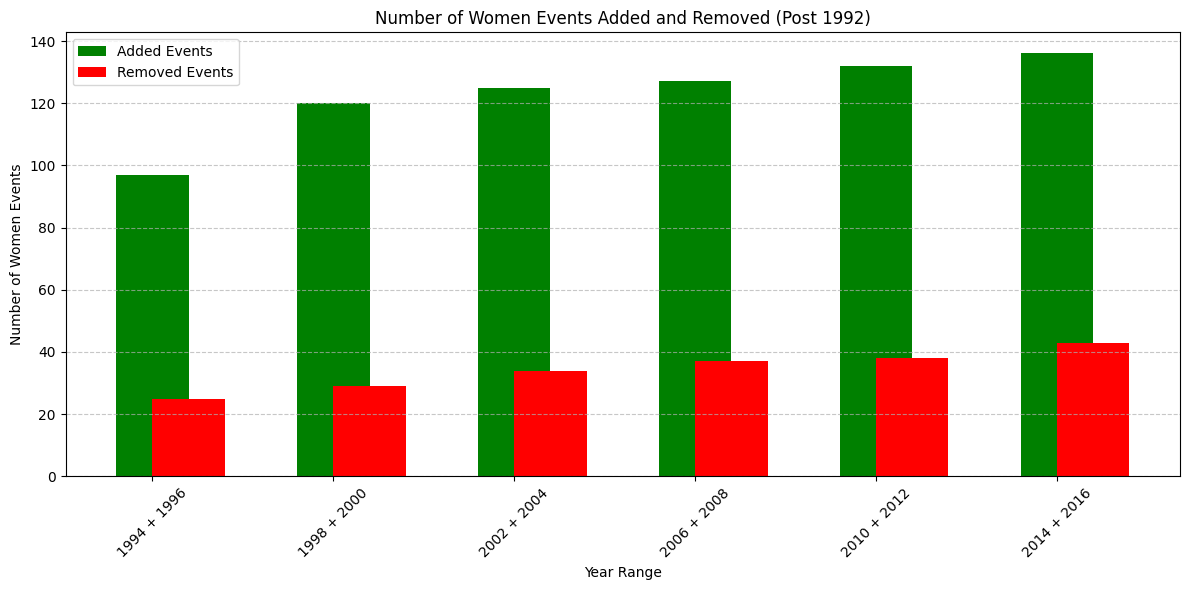

In [ ]:
# 1992년도 이후 '여성'이벤트(종목)의 개수 변화
# 필요한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('athlete_events.csv')

# 데이터 복사해두기
df_ad = data.copy()

# 'Women'이 포함된 이벤트만 추출 (Year, Sport, Event)
df_ev_women = df_ad[df_ad['Event'].str.contains('Women')][['Year', 'Sport', 'Event']].drop_duplicates()

# 1992년 이후의 데이터만 사용
df_ev_women_post_1992 = df_ev_women[df_ev_women['Year'] > 1992]

# 연도별로 고유한 'Women' 이벤트 목록을 생성
events_by_year_women = df_ev_women_post_1992.groupby('Year').apply(lambda x: set(zip(x['Sport'], x['Event'])))

# 연도를 두 개씩 묶어서 추가된 이벤트와 삭제된 이벤트 추적
grouped_years = []
added_event_counts = []
removed_event_counts = []
years = sorted(events_by_year_women.index)

for i in range(1, len(years), 2):
    # 두 연도를 묶음 (예: 1994 + 1996)
    year_range = f"{years[i-1]} + {years[i]}"
    grouped_years.append(year_range)

    # 두 연도의 이벤트 세트
    current_events = events_by_year_women[years[i]]
    previous_events = events_by_year_women[years[i-1]]

    # 추가된 이벤트: 현재 연도 묶음에서 이전 연도 묶음에 없는 이벤트
    added_events = current_events - previous_events
    added_event_counts.append(len(added_events))

    # 삭제된 이벤트: 이전 연도 묶음에서 현재 연도 묶음에 없는 이벤트
    removed_events = previous_events - current_events
    removed_event_counts.append(len(removed_events))

# 데이터프레임으로 변환하여 시각화 준비
df_event_changes = pd.DataFrame({
    'Year Range': grouped_years,
    'Added Events': added_event_counts,
    'Removed Events': removed_event_counts
})

# 시각화 - 두 연도를 묶은 여성 이벤트의 추가 및 삭제 변화 막대 그래프
plt.figure(figsize=(12, 6))
plt.bar(df_event_changes['Year Range'], df_event_changes['Added Events'], width=0.4, label='Added Events', color='green', align='center')
plt.bar(df_event_changes['Year Range'], df_event_changes['Removed Events'], width=0.4, label='Removed Events', color='red', align='edge')

# 그래프 세부 설정
plt.xlabel('Year Range')
plt.ylabel('Number of Women Events')
plt.title('Number of Women Events Added and Removed (Post 1992)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-13-5979ae187a2c>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  events_by_year = df_ev_post_1992.groupby('Year').apply(lambda x: set(zip(x['Sport'], x['Event'])))


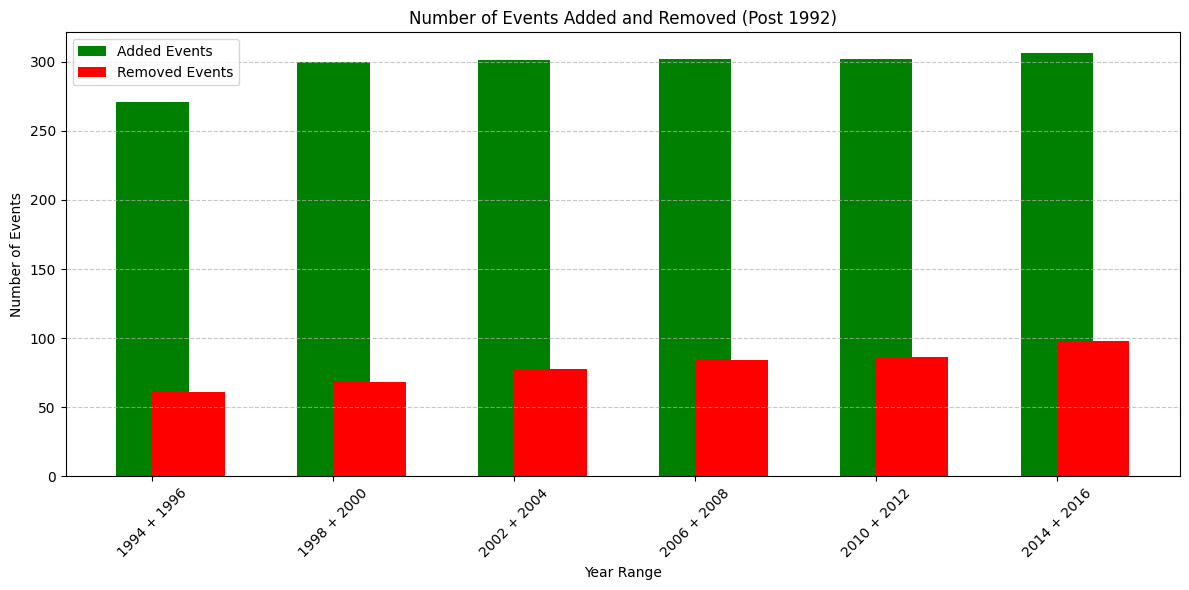

In [ ]:
# 1992년도 이후 '여성'이벤트(종목)의 개수 변화
# 필요한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('athlete_events.csv')

# 데이터 복사해두기
df_ad = data.copy()

# 이벤트만 추출 (Year, Sport, Event)
df_ev = df_ad[['Year', 'Sport', 'Event']].drop_duplicates()

# 1992년 이후의 데이터만 사용
df_ev_post_1992 = df_ev[df_ev['Year'] > 1992]

# 연도별로 고유한 'Women' 이벤트 목록을 생성
events_by_year = df_ev_post_1992.groupby('Year').apply(lambda x: set(zip(x['Sport'], x['Event'])))

# 연도를 두 개씩 묶어서 추가된 이벤트와 삭제된 이벤트 추적
grouped_years = []
added_event_counts = []
removed_event_counts = []
years = sorted(events_by_year.index)

for i in range(1, len(years), 2):
    # 두 연도를 묶음 (예: 1994 + 1996)
    year_range = f"{years[i-1]} + {years[i]}"
    grouped_years.append(year_range)

    # 두 연도의 이벤트 세트
    current_events = events_by_year[years[i]]
    previous_events = events_by_year[years[i-1]]

    # 추가된 이벤트: 현재 연도 묶음에서 이전 연도 묶음에 없는 이벤트
    added_events = current_events - previous_events
    added_event_counts.append(len(added_events))

    # 삭제된 이벤트: 이전 연도 묶음에서 현재 연도 묶음에 없는 이벤트
    removed_events = previous_events - current_events
    removed_event_counts.append(len(removed_events))

# 데이터프레임으로 변환하여 시각화 준비
df_event_changes = pd.DataFrame({
    'Year Range': grouped_years,
    'Added Events': added_event_counts,
    'Removed Events': removed_event_counts
})

# 시각화 - 두 연도를 묶은 이벤트의 추가 및 삭제 변화 막대 그래프
plt.figure(figsize=(12, 6))
plt.bar(df_event_changes['Year Range'], df_event_changes['Added Events'], width=0.4, label='Added Events', color='green', align='center')
plt.bar(df_event_changes['Year Range'], df_event_changes['Removed Events'], width=0.4, label='Removed Events', color='red', align='edge')

# 그래프 세부 설정
plt.xlabel('Year Range')
plt.ylabel('Number of Events')
plt.title('Number of Events Added and Removed (Post 1992)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 중간 보고

### 조계현
연도별 남자 축구 매달 비율  
특정 시대에 어느 나라가 올림픽 남성 축구에서 강세였는지 월드컵에서도 그런지 비교 분석  
월드컵과는 다른결과
>> 이유: 올림픽에는 국가대표 선수들이 출전 금지시기가 있었는데 공산당 체재의 나라에서 이를 회피하여 출전함.  

### 강윤제
스포츠랑 이벤트 두개로 각자 그래프로 시각화  
연도를 1992년 이후 부터 건너 띄면서 비교 진행  
변화한 이유 설명  
과정 축소  


### 강민구
이국가가 강하다고 정확히 불가  
대륙별 강세 종목 > 대륙별 메달 효자 종목  
아시아가 하키 2위인데 어떻게 가능한건지 어느 나라가 한건지 세부적으로  


### 이익현
미국과 아시아만 필터링해서 미국과 아시아의 성별에 따른 매달 획득률  
미국 남성중 금, 은, 동 얻은 비율  
미국 여성중 금, 은, 동 얻은 비율  
아시아 남성중 금, 은, 동 얻은 비율  
아시아 여성중 금, 은, 동 얻은 비율  

미국과 아시아의 성별에 따른 메달색깔(금, 은, 동)비율

# 올림픽 스포츠 발전 양상:
- 여름 올림픽과 겨울 올림픽에서 각각 새로운 스포츠와 종목이 어떻게 도입되었는지를 분석함으로써, 시즌에 따른 스포츠 발전 양상을 파악할 수 있습니다.
- 여름 올림픽에서는 수영, 육상 등 다양한 종목들이 시간이 지나면서 변화를 겪었고, 겨울 올림픽에서는 스키, 스노보드 등 겨울 스포츠의 급성장 과정을 추적할 수 있습니다.

In [ ]:
# 필요한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기, 복사하기
data = pd.read_csv('athlete_events.csv')
data_ad = data.copy()

In [ ]:
# data_ad의 콜럼 확인
print(data_ad.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [ ]:
# 'Season'종류 카운트
data_ad['Season'].value_counts()

,count
Season,
Summer,222552
Winter,48564


In [ ]:
'''
# 필요한 라이브러리
import pandas as pd

# 데이터 불러오기, 복사하기
data = pd.read_csv('athlete_events.csv')
data_ad = data.copy()
'''
# 필요한 컬럼만 추출 (Year, Season, Sport)
df_sport = data_ad[['Year', 'Season', 'Sport']].drop_duplicates()

# 연도별로 고유한 시즌과 스포츠 목록을 생성
sports_by_year = df_sport.groupby(['Year', 'Season'])['Sport'].apply(set)

# 연도 리스트
years = sorted(sports_by_year.index.get_level_values(0).unique())

# 연도별로 추가된 스포츠와 삭제된 스포츠를 추적
added_sports = {}
removed_sports = {}

for i in range(1, len(years)):
    current_year = years[i]
    previous_year = years[i - 1]

    # 두 시즌을 각각 비교
    for season in ['Summer', 'Winter']:
        if (previous_year, season) in sports_by_year and (current_year, season) in sports_by_year:
            current_sports = sports_by_year[(current_year, season)]
            previous_sports = sports_by_year[(previous_year, season)]

            # 해당 연도에 추가된 스포츠
            added = current_sports - previous_sports
            if added:
                added_sports[(current_year, season)] = added

            # 해당 연도에 삭제된 스포츠
            removed = previous_sports - current_sports
            if removed:
                removed_sports[(current_year, season)] = removed

# 결과 출력
print("추가된 스포츠:")
for year_season, sports in added_sports.items():
    print(f"Year: {year_season[0]}, Season: {year_season[1]}, Added Sports: {sports}")

print("\n삭제된 스포츠:")
for year_season, sports in removed_sports.items():
    print(f"Year: {year_season[0]}, Season: {year_season[1]}, Removed Sports: {sports}")


추가된 스포츠:
Year: 1900, Season: Summer, Added Sports: {'Rowing', 'Tug-Of-War', 'Football', 'Golf', 'Equestrianism', 'Rugby', 'Water Polo', 'Cricket', 'Croquet', 'Polo', 'Basque Pelota', 'Sailing', 'Archery'}
Year: 1904, Season: Summer, Added Sports: {'Wrestling', 'Lacrosse', 'Roque', 'Weightlifting', 'Boxing', 'Diving'}
Year: 1906, Season: Summer, Added Sports: {'Shooting'}
Year: 1908, Season: Summer, Added Sports: {'Lacrosse', 'Rugby', 'Water Polo', 'Polo', 'Racquets', 'Jeu De Paume', 'Motorboating', 'Boxing', 'Sailing', 'Figure Skating', 'Hockey', 'Archery'}
Year: 1912, Season: Summer, Added Sports: {'Art Competitions', 'Modern Pentathlon', 'Equestrianism'}
Year: 1920, Season: Summer, Added Sports: {'Rugby', 'Ice Hockey', 'Polo', 'Weightlifting', 'Boxing', 'Figure Skating', 'Hockey', 'Archery'}
Year: 1928, Season: Summer, Added Sports: {'Hockey'}
Year: 1928, Season: Winter, Added Sports: {'Skeleton'}
Year: 1932, Season: Summer, Added Sports: {'Alpinism', 'Shooting'}
Year: 1936, Season: 

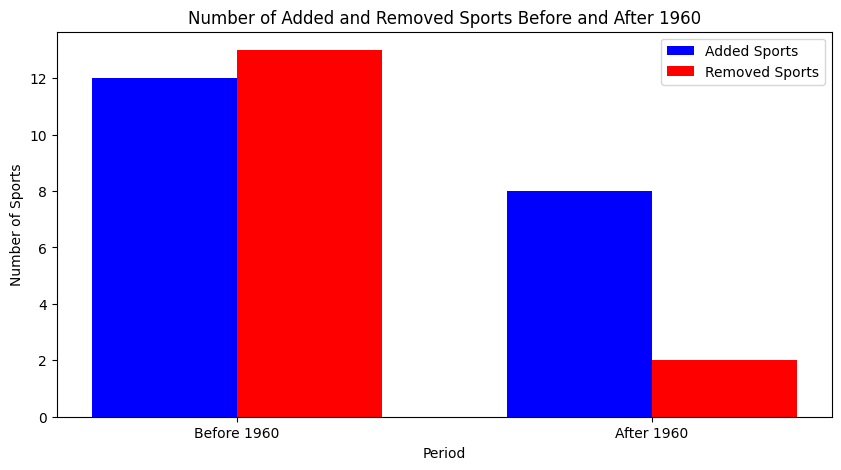

In [35]:
# 1992년 이전과 이후로 분리
added_before_1960 = {year_season: sports for year_season, sports in added_sports.items() if year_season[0] < 1960}
added_after_1960 = {year_season: sports for year_season, sports in added_sports.items() if year_season[0] >= 1960}
removed_before_1960 = {year_season: sports for year_season, sports in removed_sports.items() if year_season[0] < 1960}
removed_after_1960 = {year_season: sports for year_season, sports in removed_sports.items() if year_season[0] >= 1960}

# 각 그룹의 개수 계산
added_count = [len(added_before_1960), len(added_after_1960)]
removed_count = [len(removed_before_1960), len(removed_after_1960)]

# 그래프 시각화
labels = ['Before 1960', 'After 1960']
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.35
ax.bar(x, added_count, width=bar_width, label='Added Sports', color='b', align='center')
ax.bar([p + bar_width for p in x], removed_count, width=bar_width, label='Removed Sports', color='r', align='center')

ax.set_xlabel('Period')
ax.set_ylabel('Number of Sports')
ax.set_title('Number of Added and Removed Sports Before and After 1960')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


1. 올림픽 프로그램의 변화
초기 스포츠 프로그램의 변동성: 초창기 올림픽(1900년대)에는 많은 스포츠들이 추가되거나 삭제되었습니다. 이는 당시 올림픽 프로그램이 아직 정착되지 않았고, 시범 경기 또는 다양한 종목을 실험적으로 채택했음을 보여줍니다. 예를 들어, 1900년에는 한 해에만 13개의 스포츠가 추가되었고, 1904년에도 상당한 수의 스포츠가 추가되었습니다. 반면에, 몇몇 스포츠는 짧은 시간 내에 삭제되기도 했습니다.
안정화된 현대 올림픽: 1960년대 이후 올림픽 프로그램은 상대적으로 더 안정적이 되었습니다. 초기에는 종목의 추가 및 삭제가 빈번했으나, 이후에는 주기적으로 새로운 스포츠를 추가하거나 일부 종목을 제외하는 방식으로 변화가 일어났습니다. 예를 들어, 1992년부터는 새로운 종목들이 주로 기술 발전 또는 대중의 관심에 따라 추가되었음을 볼 수 있습니다(예: 야구, 배드민턴, 프리스타일 스키).
2. 동계 및 하계 올림픽의 분리
1992년 이후 동계 올림픽과 하계 올림픽이 다른 해에 열리면서, 동계와 하계 스포츠의 변화 패턴이 각각 독립적으로 나타났습니다. 이로 인해 동계 올림픽에서는 프리스타일 스키, 쇼트트랙 등의 새로운 동계 스포츠가 등장했고, 하계 올림픽에서는 배드민턴, 야구, 테니스 등이 추가되었습니다.
3. 스포츠의 재도입 및 삭제
특정 스포츠가 한 번 올림픽에서 제외되었다가 다시 재도입된 경우도 많습니다. 예를 들어, 럭비는 1900년, 1908년, 1920년에 포함되었다가 한동안 제외되었고, 이후 다시 채택되었습니다. 스켈레톤(Skeleton)은 1928년과 1948년에 추가되었으나 삭제되었다가 이후 2002년에 다시 추가되었습니다. 이러한 재도입은 해당 스포츠에 대한 대중적 관심이나 국제 경기력의 향상과 관련이 있을 수 있습니다.
4. 문화적 및 기술적 변화 반영
문화적 변화: 올림픽 프로그램의 변화는 세계적인 스포츠 문화의 변화와도 맞닿아 있습니다. 예를 들어, 체조 리듬체조(1984년), 테니스(1988년), 배드민턴(1992년)과 같은 새로운 종목들은 시간이 지남에 따라 점점 더 많은 사람들에게 인기를 끌며 올림픽에서 채택되었습니다.
기술적 변화: 기술의 발전으로 인해 프리스타일 스키(1992년), 쇼트트랙 스피드스케이팅(1992년) 등 기술적 역량이 필요한 새로운 스포츠들이 추가되었습니다.
5. 스포츠의 지리적·정치적 요인
특정 스포츠의 추가 또는 삭제는 종종 정치적 또는 지리적 요인과 관련이 있습니다. 예를 들어, 1980년대 미국과 소련 간의 냉전으로 인해 각국이 선호하는 스포츠들이 올림픽 종목에서 갈등을 일으키거나 변동을 겪을 가능성이 높았습니다.
아시아권의 성장: 배드민턴, 탁구와 같은 아시아 국가들에서 강세를 보이는 스포츠가 1990년대 이후에 추가된 것은 아시아 국가들의 스포츠 영향력 증대를 시사합니다.
6. 여성 스포츠의 증가
추가된 종목 중에는 여성 스포츠의 증가도 두드러집니다. 1984년 리듬체조와 싱크로나이즈드 스위밍 같은 종목의 추가는 여성 스포츠 참여를 장려하기 위한 움직임의 일환으로 볼 수 있습니다. 이후에도 여자 축구 등 다양한 여성 스포츠 종목이 추가되었습니다.
7. 특정 스포츠의 시범 경기 또는 비정규적 개최
예술 경쟁(Art Competitions)이나 알피니즘(Alpinism)과 같은 비전통적인 스포츠가 잠깐 동안 포함되었다가 제외된 것을 볼 수 있습니다. 이는 당시 문화적 또는 특정 상황에서만 열린 시범 경기로 여겨질 수 있습니다.